# MULTI-LABEL ML CLASSIFICATION NLP

Source code and approach: 
https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/

Source datasets: 
https://www.kaggle.com/datasets/meetnaren/goodreads-best-books/data
https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data/data

source reference: https://towardsdatascience.com/keras-tell-me-the-genre-of-my-book-a417d213e3a1



## Data exploration 

In [1]:
import pandas as pd
df1 = pd.read_csv('../assets/ml_model/multilabel_book_dataset.csv')
df2 = pd.read_csv('../assets/ml_model/multilabel_book_dataset2.csv')
df2 = (df2.drop(columns=['Unnamed: 0', 'URL'])
       .rename(columns= {'Book': 'title', 'Author':'author', 'Genres':'genres', 'Description':'description'})
)

# combine the two dfs
df = pd.concat([df1,df2])
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 62478 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             62478 non-null  object 
 1   series            23470 non-null  object 
 2   author            62478 non-null  object 
 3   rating            52478 non-null  float64
 4   description       61063 non-null  object 
 5   language          48672 non-null  object 
 6   isbn              52478 non-null  object 
 7   genres            62478 non-null  object 
 8   characters        52478 non-null  object 
 9   bookFormat        51005 non-null  object 
 10  edition           4955 non-null   object 
 11  pages             50131 non-null  object 
 12  publisher         48782 non-null  object 
 13  publishDate       51598 non-null  object 
 14  firstPublishDate  31152 non-null  object 
 15  awards            52478 non-null  object 
 16  numRatings        52478 non-null  float64
 17 

(62478, 25)

In [2]:
df.duplicated(subset=['title']).sum()

7245

In [3]:
# remove empty and duplicates
df = (df.query('genres != "[]"')
    .dropna(subset=['description'])
    .drop_duplicates(subset=['description','title'])
)
df.shape

(52937, 25)

In [4]:
# remove non english descriptions
from langdetect import detect

def detect_language(description):
    try:
        return detect(description)
    except Exception as e:
        print(f"Error: {e}")
        return 'unknown'
    
df['Language_detect'] = df['description'].apply(detect_language)
df = df.query('Language_detect=="en"')

Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.


In [5]:
df.genres.value_counts()

genres
['Fiction']                                                                                                                                         192
['Fantasy']                                                                                                                                         164
['Nonfiction']                                                                                                                                       96
['Childrens']                                                                                                                                        92
['Poetry']                                                                                                                                           81
                                                                                                                                                   ... 
['Mystery', 'Historical Fiction', 'Fiction', 'Historical', 'Historical Mystery', 

In [6]:
df.head()

,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,...,numRatings,ratingsByStars,likedPercent,setting,bbeScore,bbeVotes,price,Avg_Rating,Num_Ratings,Language_detect
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,...,6376780.0,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",2993816.0,30516.0,5.09,NaN,NaN,en
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,...,2507623.0,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,2632233.0,26923.0,7.38,NaN,NaN,en
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,...,4501075.0,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",2269402.0,23328.0,NaN,NaN,NaN,en
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,...,2998241.0,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",1983116.0,20452.0,NaN,NaN,NaN,en
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,...,4964519.0,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",1459448.0,14874.0,2.1,NaN,NaN,en


## data cleaning 

In [7]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [8]:
books = df[['title','description','genres']].copy()

In [9]:
books.shape

(47921, 3)

In [10]:
from ast import literal_eval
books['genres'] = books['genres'].apply(literal_eval)
all_categories = sum(books['genres'], [])
print('numer of categories before cleaning', len(set(all_categories)))

numer of categories before cleaning 981


In [11]:
all_genres = nltk.FreqDist(all_categories) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [12]:
# remove categories with less than 100 counts
remove_books = all_genres_df.query('Count < 100')['Genre'].tolist()
books['new_genres'] = books['genres'].apply(lambda genre_list: [genre for genre in genre_list if genre not in remove_books])
books = books.dropna(subset=['new_genres','description'])
all_new_genres = sum(books['new_genres'], [])
print(f"number of genres after cleaning:",len(set(all_new_genres)))

number of genres after cleaning: 309


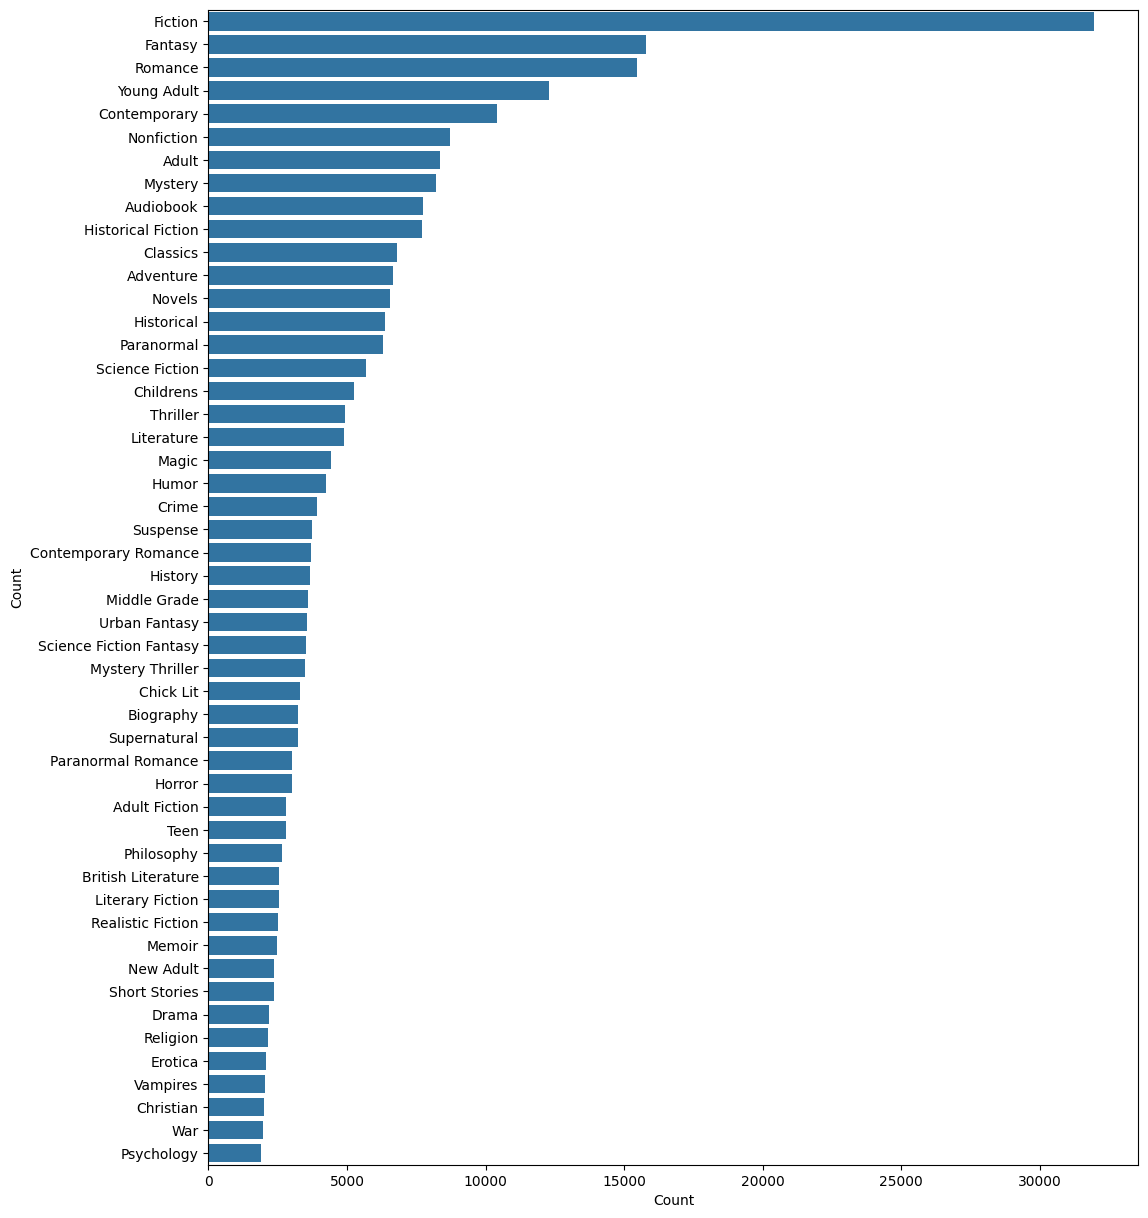

In [13]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()


## data pre-processing 

In [14]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
books['description'] = books['description'].apply(lambda x: clean_text(x))


In [15]:
books.sample(3)


,title,description,genres,new_genres
8604,The Last Leaf,sue and johnsy are two girlfriends who live together in new york city when johnsy becomes sick one winter she makes up her mind to die when the last leaf falls from the ivy plant growing outside her window sue would do anything to help her friend get well but she is a poor artist as the winter w...,"[Short Stories, Classics, Fiction, Literature, American, School, Read For School, Novels, Drama, Inspirational]","[Short Stories, Classics, Fiction, Literature, American, School, Read For School, Novels, Drama, Inspirational]"
48145,Lenin and Philosophy and Other Essays,no figure among the western marxist theoreticians has loomed larger in the postwar period than louis althusser a rebel against the catholic tradition in which he was raised althusser studied philosophy and later joined both the faculty of the ecole normal superieure and the french communist part...,"[Philosophy, Theory, Politics, Essays, Nonfiction, France, Academic, Sociology, Economics, Psychoanalysis]","[Philosophy, Theory, Politics, Essays, Nonfiction, France, Academic, Sociology, Economics]"
51085,Dragonsblood,in dragon s kin bestselling author anne mccaffrey did the unthinkable for the first time ever she invited another writer to join her in the skies of her most famous fictional creation that writer was her son todd mccaffrey together they penned a triumphant new chapter in the annals of the extrao...,"[Fantasy, Science Fiction, Dragons, Fiction, Science Fiction Fantasy, Audiobook, Adventure, Adult, Speculative Fiction, Epic Fantasy]","[Fantasy, Science Fiction, Dragons, Fiction, Science Fiction Fantasy, Audiobook, Adventure, Adult, Speculative Fiction, Epic Fantasy]"


In [16]:
# remove stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['clean_descriptiont'] = books['description'].apply(lambda x: remove_stopwords(x))


In [17]:
# genres to features - VECTORIZATION
import pickle 
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(books['new_genres'])

# transform target variable
y = multilabel_binarizer.transform(books['new_genres'])

# store vectoriser for later 
pickle.dump(multilabel_binarizer, open("../assets/ml_model/multilabel_binarizer.pickle", "wb"))

In [18]:
y.shape

(47921, 309)

In [19]:
xtrain, xval, ytrain, yval = train_test_split(books['clean_descriptiont'], y, test_size=0.2, random_state=9)

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

pickle.dump(tfidf_vectorizer, open("../assets/ml_model/tfidf_vectorizer.pickle", "wb"))

In [21]:
# Train ML model 

In [22]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=1000)
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
# save model
pickle.dump(clf, open("../assets/ml_model/ML2", "wb"))

In [24]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Christianity', 'Nonfiction', 'Religion', 'Theology')

In [25]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.4781127836441249

In [26]:
# predict probabilities
y_pred = clf.predict(xval_tfidf)

In [27]:
# see prediction on test data
results = pd.DataFrame(xval)
results['genre_predicted'] = multilabel_binarizer.inverse_transform(y_pred)
results.merge(books[['title', 'genres']], left_index=True, right_index=True)

,clean_descriptiont,genre_predicted,title,genres
35487,girl become witch accident course leigh epstein grief stricken lonely elementary school teacher devastated brutal unexpected death true love hands careless writer overcomes grief taking matters hands takes little romance writing resurrect vampire werewolf book boyfriend leigh gets bargained disc...,"(Fantasy, Fiction, Paranormal, Romance, Young Adult)",Accidental Leigh,"[Paranormal, Romance, Witches, Paranormal Romance, Fantasy, Humor, Fiction, Magic, Chick Lit, Contemporary]"
7993,master commander raised almost dangerously high expectations post captain triumphantly surpasses brilliant book mary renault best historical novels ever written new york times,"(Fiction, Historical, Historical Fiction)",Post Captain,"[Historical Fiction, Fiction, Historical, Adventure, War, Audiobook, Military Fiction, Literature, British Literature, Classics]"
18458,pretty pink meets anna french kiss charming romantic comedy ella nearly invisible willing school thats fine shes got friends fabulous frankie sweet cohort sadie shes got art idol unappreciated th century painter edward willing still hard nobody crush biggest somebody school alex bainbridge espec...,"(Chick Lit, Contemporary, Fiction, Humor, Realistic Fiction, Romance, Young Adult)",The Fine Art of Truth or Dare,"[Young Adult, Romance, Contemporary, Chick Lit, Realistic Fiction, Young Adult Contemporary, Fiction, High School, Teen, Young Adult Romance]"
9133,really choose religion science ground breaking work old testament scholar john sailhamer shines new light opening chapters bible revealing centuries old misunderstandings continued shape popular biblical interpretation well greatly contributing unnecessary conflicts bible science pointing answer...,"(Christianity, Nonfiction, Religion, Theology)",Pied Piper,"[Fiction, Historical Fiction, War, World War II, Classics, France, Historical, Adventure, British Literature, Novels]"
9133,really choose religion science ground breaking work old testament scholar john sailhamer shines new light opening chapters bible revealing centuries old misunderstandings continued shape popular biblical interpretation well greatly contributing unnecessary conflicts bible science pointing answer...,"(Christianity, Nonfiction, Religion, Theology)",Genesis Unbound: A Provocative New Look at the Creation Account,"[Theology, Christian, Christianity, Science, Faith, Spirituality, Nonfiction]"
...,...,...,...,...
38066,youre offered become goddess love refuse hannah asked take place goddess love agrees assigned love life happens gorgeous sun god though knack listening peoples heartaches shes totally new cant understand help bring love peoples lives cant even get one particular boy pay attention hannah ever sur...,"(Contemporary, Fiction, Romance, Young Adult)",Interim Goddess of Love,"[Romance, Fantasy, Young Adult, Mythology, Chick Lit, Contemporary, Fiction, New Adult, Contemporary Romance, Novella]"
6662,orphaned sisters sabrina daphne sent live mysterious grandmother girls start school daphne lucky get snow white teacher sabrina stuck mean mr grumpner class mildly psychotic sixth graders mr grumpner murdered sisters must discover everafter responsible,"(Childrens, Fiction, Juvenile, Middle Grade, Young Adult)",The Unusual Suspects,"[Fantasy, Mystery, Fairy Tales, Middle Grade, Childrens, Fiction, Young Adult, Adventure, Magic, Juvenile]"
6662,orphaned sisters sabrina daphne sent live mysterious grandmother girls start school daphne lucky get snow white teacher sabrina stuck mean mr grumpner class mildly psychotic sixth graders mr grumpner murdered sisters must discover everafter responsible,"(Childrens, Fiction, Juvenile, Middle Grade, Young Adult)",The Piper's Son,"[Young Adult, Contemporary, Romance, Fiction, Realistic Fiction, New Adult, Music]"
26595,page article extracted book master thoughts master minds poem prose pencil thomas gray,"(Fiction, Poetry)",An Elegy Written In A Country Churchyard,"[Poet

# Program 

In [28]:
import pandas as pd

In [29]:
# function for text cleaning 
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

# remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)



In [30]:
# load vectoriser, multilabel Binarizer and the model 
import pickle
tfidf_vectorizer = pickle.load(open("../assets/ml_model/tfidf_vectorizer.pickle", "rb"))
loaded_model = pickle.load(open("../assets/ml_model/ML2", "rb"))
multilabel_binarizer = pickle.load(open("../assets/ml_model/multilabel_binarizer.pickle", "rb"))

In [31]:
from ast import literal_eval
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = loaded_model.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [12]:
for i in range(50): 
  k = mybooks.sample(1).index[0]
  print("Movie: ", mybooks['Title'][k], "\nPredicted genre: ", infer_tags(mybooks['Description'][k]))

NameError: name 'infer_tags' is not defined

## Make a ML prediction model program where genre is added to book df for the app

In [1]:
import pandas as pd
mybooks = pd.read_parquet('../assets/my_books.parquet', engine='pyarrow')


In [2]:
# set working directory to same place ass app.py to import programs the same way as the app
import os
current_directory = os.getcwd()
if 'notebooks' in current_directory:
    parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
    os.chdir(parent_directory)
os.getcwd()

'/Users/elisealstad/code/mybook-dashboard'

In [3]:
# predict genre

from apps.prediction import ml_genre
nmyreads = ml_genre(mybooks)

In [4]:
mybooks.head(2)


,Book_Id,Title,Author,Author_l-f,Additional_Authors,ISBN_Goodreads,ISBN13,My_Rating,Average_Rating_Goodreads,Publisher,...,Categories,Average_Rating_GoogleBooks,Rating_Count,Language,Title_org,Page_Cat,Year,Quarter,Year_Quarter,genres
249,947755,Monkey Hunting: A Novel (Ballantine Reader's C...,Cristina García,"García, Cristina",None,"=""0345466101""","=""9780345466105""",4,3.65,Ballantine Books,...,None,NaN,NaN,None,None,250-349,2020.0,2.0,2020-Q2,None
221,35051839,Pachinko,Min Jin Lee,"Lee, Min Jin",None,"=""178669137X""","=""9781786691378""",5,4.33,Head of Zeus,...,None,NaN,NaN,None,None,450-599,2020.0,2.0,2020-Q2,None


In [5]:
nmyreads

,Book_Id,Title,Author,Author_l-f,Additional_Authors,ISBN_Goodreads,ISBN13,My_Rating,Average_Rating_Goodreads,Publisher,...,Categories,Average_Rating_GoogleBooks,Rating_Count,Language,Title_org,Page_Cat,Year,Quarter,Year_Quarter,genres
249,947755,Monkey Hunting: A Novel (Ballantine Reader's C...,Cristina García,"García, Cristina",None,"=""0345466101""","=""9780345466105""",4,3.65,Ballantine Books,...,None,NaN,NaN,None,None,250-349,2020.0,2.0,2020-Q2,None
221,35051839,Pachinko,Min Jin Lee,"Lee, Min Jin",None,"=""178669137X""","=""9781786691378""",5,4.33,Head of Zeus,...,None,NaN,NaN,None,None,450-599,2020.0,2.0,2020-Q2,None
16,2657,To Kill a Mockingbird,Harper Lee,"Lee, Harper",None,"=""""","=""""",4,4.26,Harper Perennial Modern Classics,...,Fiction,3.5,14.0,en,To Kill a Mockingbird,250-349,2020.0,2.0,2020-Q2,"['Classics', 'Fiction', 'Historical Fiction', ..."
236,266466,Fiesta: The Sun Also Rises,Ernest Hemingway,"Hemingway, Ernest",None,"=""0099908506""","=""9780099908500""",2,3.79,Arrow Books,...,None,NaN,NaN,None,None,100-249,2020.0,3.0,2020-Q3,None
65,44064191,The Sympathizer,Viet Thanh Nguyen,"Nguyen, Viet Thanh",None,"=""""","=""""",5,4.01,Corsair,...,Fiction,2.5,2.0,en,The Sympathizer,350-449,2020.0,3.0,2020-Q3,"['American', 'Contemporary', 'Fiction', 'Histo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,33385229,"They Both Die at the End (Death-Cast, #1)",Adam Silvera,"Silvera, Adam",None,"=""0062457799""","=""9780062457790""",0,3.76,Quill Tree Books,...,None,NaN,NaN,None,None,350-449,NaN,NaN,,None
247,320,One Hundred Years of Solitude,Gabriel García Márquez,"Márquez, Gabriel García",Gregory Rabassa,"=""""","=""""",0,4.12,Harper,...,Fiction,NaN,NaN,en,One Hundred Years of Solitude,350-449,NaN,NaN,,"['Classics', 'Fiction', 'Historical Fiction', ..."
248,62291,"A Storm of Swords (A Song of Ice and Fire, #3)",George R.R. Martin,"Martin, George R.R.",None,"=""055357342X""","=""9780553573428""",0,4.54,Bantam,...,None,NaN,NaN,None,None,1000+,NaN,NaN,,None
250,26828881,Mormor danset i regnet,Trude Teige,"Teige, Trude",None,"=""""","=""9788203359309""",0,4.16,Aschehoug,...,None,NaN,NaN,no,Mormor danset i regnet,250-349,NaN,NaN,,None


In [6]:
# pd.to_pickle(nmyreads, 'assets/my_books_genres.pickle')
import pickle
# nmyreads.to_pickle("assets/my_books.pkl")
nmyreads.to_parquet('assets/my_books_genres.parquet', engine='pyarrow')
